# Plotting in Examples Formulas and Open Data in Matplotlib

[(TASK I)](#task1)

#### Data directory

In [1]:
data_dir = '../data/'

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import itertools # for creating combinations of plotting parameters

# TASK I: <a class="anchor" id="task1"></a>

Improve your previous plot by applying the following modifications:

1. Aggregate data weekly – display the number of vaccinations per week instead of per day.
2. Use a logarithmic scale on the y-axis using <code>ax.semilogy()</code>.
3. Highlight values greater than 100 in red to make them stand out.
4. Enhance readability by increasing the font size of both axis labels and making them bold.

Tip: Experiment with Matplotlib’s formatting options (<code>fontsize</code>, <code>fontweight</code>, <code>color</code>, etc.) to fine-tune your figure.

Try it out and observe how these visual adjustments improve the clarity of your plot!

In [6]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)
print("Format of dataset: ", type(client))

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# from: https://analisi.transparenciacatalunya.cat/Salut/Vacunaci-per-al-COVID-19-dosis-administrades-per-m/irki-p3c7
results = client.get("irki-p3c7", limit=2000) # 2000 is the number of rows that we scrape from the web page

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

Format of dataset:  <class 'sodapy.socrata.Socrata'>


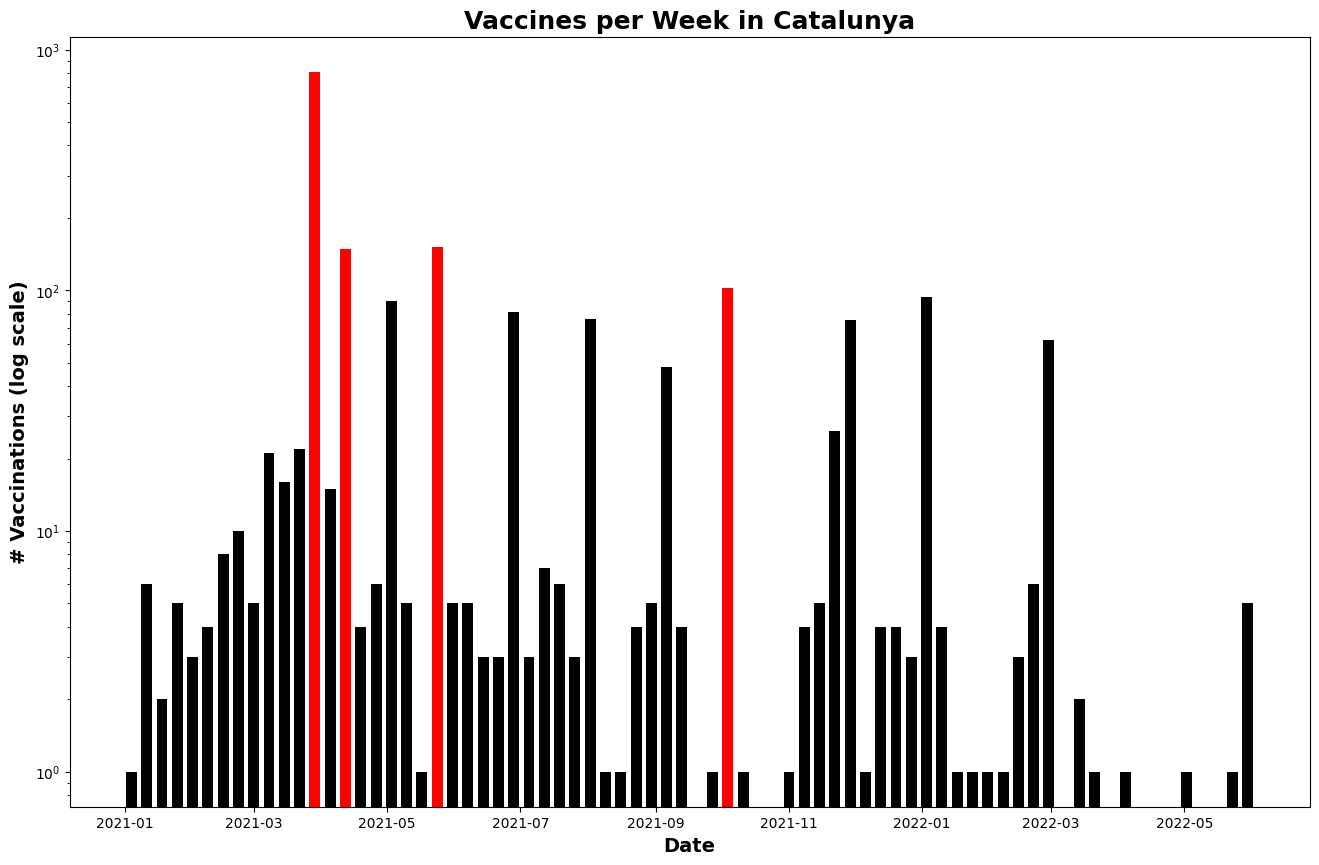

In [9]:
# Convert dates in table to Python datetime objects
dates = pd.to_datetime(results_df["data"], format='%Y-%m-%dT%H:%M:%S.%f')

# Count vaccinations per week instead of per day
vaccines_per_week = dates.dt.to_period('W').value_counts().sort_index()

# Create figure and axis
f, ax = plt.subplots(figsize=(16, 10))

# Separate values above and below 100 for coloring
above_100 = vaccines_per_week > 100

# Plot bars
ax.bar(vaccines_per_week.index.to_timestamp(), 
       vaccines_per_week,
       width=5,
       color=['red' if v else 'black' for v in above_100])

# Use logarithmic scale for y-axis
ax.semilogy()

# Improve readability of labels and title
ax.set_title("Vaccines per Week in Catalunya", fontsize=18, fontweight='bold')
ax.set_xlabel("Date", fontsize=14, fontweight='bold')
ax.set_ylabel("# Vaccinations (log scale)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better visibility
#plt.xticks(rotation=60)

# Adjust layout
#plt.tight_layout()

plt.show()